### 📍 **Importação de Bibliotecas e Módulos**

In [1]:
%pip -q install plotly --upgrade


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df_credit = pd.read_csv('../database/credit_data.csv', encoding='ISO-8859-1')

### 📍 **Visualização de Dados**

In [4]:
df_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [5]:
np.unique(df_credit['default'], return_counts=True)

(array([0, 1], dtype=int64), array([1717,  283], dtype=int64))

### 📍 **Plotagem Gráfica**

C:\Users\miran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\miran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\miran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

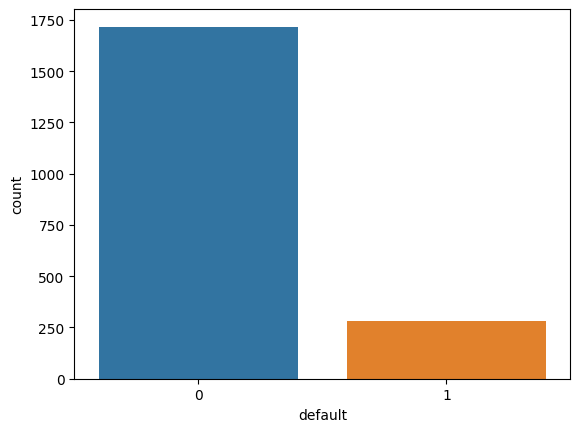

In [6]:
sns.countplot(x = df_credit['default']);

### 📍 **Tratamento de Dados**

In [7]:
df_credit['age'][df_credit['age'] > 0].mean()

40.92770044906149

In [8]:
df_credit.loc[df_credit['age'] < 0, 'age'] = 40.92
df_credit.loc[df_credit['age'] < 0]

,clientid,income,age,loan,default


In [9]:
df_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [10]:
df_credit['age'].fillna(df_credit['age'].mean(), inplace = True)
df_credit.loc[pd.isnull(df_credit['age'])]

,clientid,income,age,loan,default


### 📍 **Divisão das Variáveis**

In [11]:
X_credit = df_credit.iloc[:, 1:4].values
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [12]:
y_credit = df_credit.iloc[:, 4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### 📍 **Escalonamento de Atributos**

In [13]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()

X_credit = scaler_credit.fit_transform(X_credit)

### 📍 **Divisão de Teste e Treinamento**

In [14]:
from sklearn.model_selection import train_test_split

`train_test_split` é uma função do módulo `model_selection` da biblioteca `scikit-learn`. Ela é usada para dividir matrizes ou arrays em subconjuntos aleatórios de treinamento e teste¹. É uma ferramenta rápida que envolve a validação de entrada, a aplicação do método `split` do objeto `ShuffleSplit` nos dados de entrada e a aplicação aos dados de entrada em uma única chamada para dividir (e opcionalmente subamostrar) os dados em uma linha.

In [15]:
X_credit_training_set, X_credit_test_set, y_credit_training_set, y_credit_test_set = train_test_split(X_credit, y_credit, test_size=0.25, random_state = 0)

Aqui eu estou usando a função `train_test_split` para dividir um conjunto de dados em conjuntos de treinamento e teste.

- `X_credit_training_set, X_credit_test_set, y_credit_training_set, y_credit_test_set`: Estas são as variáveis que irão armazenar os conjuntos de treinamento e teste resultantes. `X_credit_training_set` e `X_credit_test_set` irão armazenar os recursos (ou variáveis independentes) para treinamento e teste, respectivamente. Da mesma forma, `y_credit_training_set` e `y_credit_test_set` irão armazenar os rótulos (ou variáveis dependentes) para treinamento e teste, respectivamente.

- `train_test_split(X_credit, y_credit, test_size=0.25, random_state = 0)`: Esta é a chamada para a função `train_test_split`. `X_credit` e `y_credit` são os dados que desejamos dividir. `test_size=0.25` significa que 25% dos dados serão usados para o conjunto de teste, e o restante (75%) será usado para o conjunto de treinamento. `random_state = 0` é usado para garantir que a divisão seja reproduzível. Isso significa que ao executar o código novamente, obteremos a mesma divisão dos dados.

In [18]:
X_credit_training_set.shape, X_credit_test_set.shape

((1500, 3), (500, 3))

In [19]:
y_credit_training_set.shape, y_credit_test_set.shape

((1500,), (500,))

### 📍 **Salvando Variáveis no formato pkl**

In [20]:
import pickle

In [21]:
with open('credit_data.pkl', mode = 'wb') as f:
    pickle.dump([X_credit_training_set, y_credit_training_set, X_credit_test_set, y_credit_test_set], f)